#Author : Mohamed Hesham Zidan©

In [ ]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

###Helper Functions

In [ ]:
def average_intensity(hist):
  # Get the number of bins (should be 256 in this case)
  num_bins = len(hist)

  # Calculate the sum of weighted intensities
  total_intensity = 0
  for bin_idx in range(num_bins):
    # Intensity value for this bin (assuming a linear scale from 0 to 255)
    intensity = bin_idx

    # Weight by the frequency in the bin
    weight = hist[bin_idx]

    # Add weighted intensity to the total
    total_intensity += intensity * weight

  # Calculate the total number of pixels (assuming the image is not empty)
  total_pixels = gray1.size  # Assuming 'gray1' is a 2D grayscale image

  # Estimate the average intensity
  average_intensity = total_intensity / total_pixels

  print("Estimated average intensity:", average_intensity)
  return int(average_intensity)

In [ ]:
def find_intersection(line1, line2):
  """
  This function finds the intersection point of two lines represented by (rho, theta) format.

  Args:
      line1: A list containing (rho, theta) for the first line.
      line2: A list containing (rho, theta) for the second line.

  Returns:
      A tuple containing the x and y coordinates of the intersection point,
      or None if the lines are parallel.
  """
  rho1, theta1 = line1[0]
  rho2, theta2 = line2[0]

  # Check for parallel lines (avoid division by zero)
  if np.abs(np.sin(theta1 - theta2)) < 1e-6:
    return None

  a1, b1 = np.cos(theta1), np.sin(theta1)
  a2, b2 = np.cos(theta2), np.sin(theta2)

  # Calculate the intersection point coordinates
  x = int((rho2 * b1 - rho1 * b2) / (a2 * b1 - a1 * b2))
  y = int((rho1 * a2 - rho2 * a1) / (a2 * b1 - a1 * b2))

  return (x, y)

In [ ]:
def visualize_intersections(image, lines):
  """
  This function iterates through pairs of lines, finds their intersection,
  and draws a red circle at the intersection point on the image.

  Args:
      image: The image where lines were detected.
      lines: A list of lines, where each line is a list containing (rho, theta).
  """
  image_copy = copy.copy(image)
  intersections=[]
  for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
      intersection = find_intersection(lines[i], lines[j])
      if intersection:

        x, y = intersection
        intersections.append([x,y])
        cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1)

  plt.imshow(image_copy, cmap="gray")
  plt.title('hough points of intersection')
  plt.show()
  return intersections

In [ ]:
def draw_lines(image,lines):
  image_copy = copy.copy(image)
  if lines is not None and lines.any():
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        # print(line)
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 0), 1)
  plt.imshow(image_copy, cmap="gray")
  plt.title('Image with hough lines')
  plt.show()

In [ ]:
def connect_all_points(image, points):
  """
  This function connects each point with every other point in a list of lists
  containing XY coordinates.

  Args:
      image: The image where lines will be drawn.
      points: A list of lists, where each inner list represents a point (x, y).
  """
  image_copy = copy.copy(image)
  color = (0, 0, 0)  # Red color for lines
  for i in range(len(points)):
    for j in range(i + 1, len(points)):  # Start from j = i + 1 to avoid duplicates
      start_point = (points[i][0], points[i][1])
      end_point = (points[j][0], points[j][1])
      cv2.line(image_copy, start_point, end_point, color, 1)  # Draw line with thickness 2
  plt.imshow(image_copy, cmap="gray")
  plt.show()
  return image_copy


In [ ]:
def show_largest_contour(image , contours):
  """
  This function displays the image with the largest area contour highlighted.

  Args:
      image: to draw contour on
      contours : detected contours to choose the largest from
  """

  image_copy = copy.copy(image)
  max_area = 0
  largest_contour_index = None
  for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area > max_area:
      max_area = area
      largest_contour_index = i

  # Draw the largest contour (if any)
  if largest_contour_index is not None:
    # Draw the contour in green with a thickness of 2
    cv2.drawContours(image_copy, [contours[largest_contour_index]], -1, (0, 255, 0), 2)  # Green color
  plt.imshow(image_copy, cmap="gray")
  plt.title('Largest contour Area')
  plt.show()

  return contours[largest_contour_index]


In [ ]:
def rotate_image(Image, angle):
  """
  Rotates an image by the specified angle.

  Args:
      image_path: Path to the image file.
      angle: Rotation angle in degrees (positive for clockwise rotation).

  Returns:
      The rotated image as a NumPy array.
  """

  # Load the image

  # Get image dimensions (assuming no alpha channel)
  rows, cols = Image.shape[:2]

  # Define the rotation matrix for a clockwise rotation of 90 degrees
  rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1.0)  # Center of rotation, angle, scale

  # Rotate the image using the rotation matrix
  rotated_image = cv2.warpAffine(Image, rotation_matrix, (cols, rows))

  return rotated_image

In [ ]:
def find_unique_pixel_values(image):
  """
  This function finds the unique pixel values present in an image.

  Args:
      image: the image as numpy array

  Returns:
      A NumPy array containing the unique pixel values.
  """

  # Reshape the image data to flatten each pixel's color components into rows
  flattened_image = image.reshape(-1)

  # Find the unique rows (representing unique color combinations)
  unique_values, counts = np.unique(flattened_image, axis=0, return_counts=True)

  return unique_values, counts

In [ ]:
def is_Dark(unique_values):
  # image = copy.copy(img)
  if unique_values.max() < 100:
    return True
  else :
    return False


In [ ]:
def is_inv(image):
  from scipy import stats

  first_row_mode , _ = stats.mode(image [0,:]) # first row
  last_row_mode , _ = stats.mode(image[-1,:])  # last_row
  first_column_mode , _= stats.mode(image[:,0]) #first column
  first_column_mode , _ = stats.mode(image[:,-1]) #last column

  if first_row_mode == 0 and last_row_mode == 0 and first_column_mode == 0 and first_column_mode == 0:

    return True

  else:

    return False

In [ ]:
def is_flipped(image):
  # an Unflipped QR code has most of its first and last portion of the first column and first row is black
  # we can use this in our advantage after getting the frame of the image and see if it is flipped or not

  begining_first_row = image[3,5:150]
  last_first_row = image[3,350:495]

  begining_first_column = image[5:150,3]
  last_first_column = image[350:495,3]

  _1 = np.all(begining_first_row == begining_first_row[0])
  _2 = np.all(last_first_row == last_first_row[0])
  _3 = np.all(begining_first_column == begining_first_column[0])
  _4 = np.all(last_first_column == last_first_column[0])

  for _ in range(4):
    if _1 and _2 and _3 and _4:
      break
    else:
      rotate_code = cv2.ROTATE_90_COUNTERCLOCKWISE
      # Rotate the image
      image = cv2.rotate(image, rotate_code)

      begining_first_row = image[3,5:150]
      last_first_row = image[3,350:495]

      begining_first_column = image[5:150,3]
      last_first_column = image[350:495,3]

      _1 = np.all(begining_first_row == begining_first_row[0])
      _2 = np.all(last_first_row == last_first_row[0])
      _3 = np.all(begining_first_column == begining_first_column[0])
      _4 = np.all(last_first_column == last_first_column[0])

  plt.imshow(image, cmap="gray")
  plt.show()
  return image


#Image Anaysis

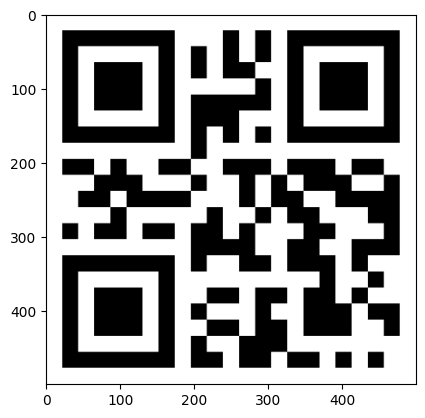

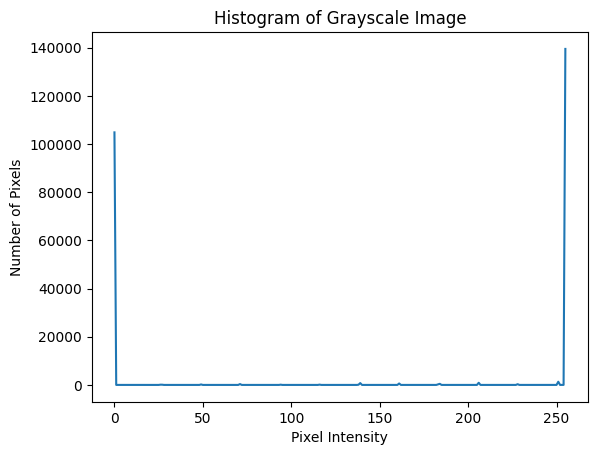

[  0   1   7  24  26  27  39  49  51  64  68  71  75  76  93  94 100 102
 116 132 138 139 151 152 161 162 164 167 172 176 181 183 184 185 187 192
 197 204 206 210 211 216 220 222 224 228 229 233 237 241 246 248 250 251
 252 253 254 255]
no. unique in image 1: 58
[104828      3      1      1    100     93      1    194      2      1
      1    363      3      1      1    106      1      1    127      1
     75    764      1      1    604      1      1      1      1      1
      1    225    461      1      2      1      1      1    901      1
      3      1      4      1      1    303      1      1      1      1
      1      1      3   1321      2      1     14 139466]


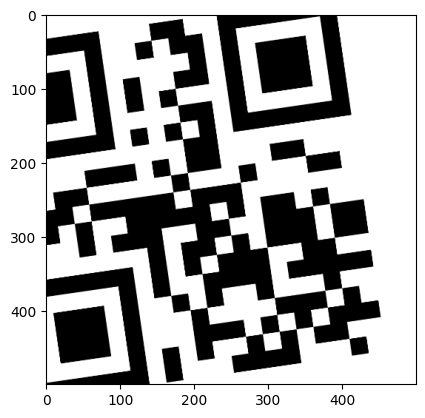

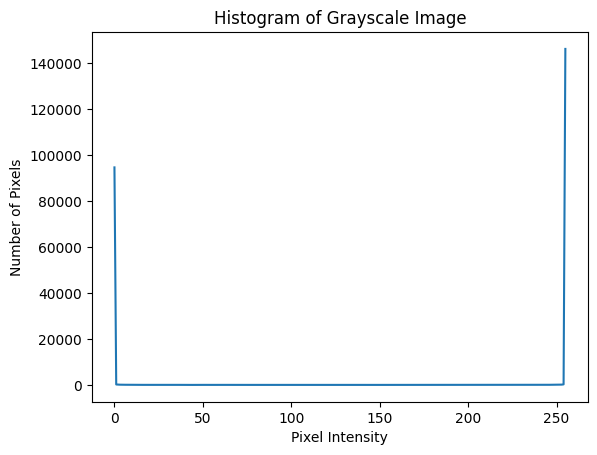

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

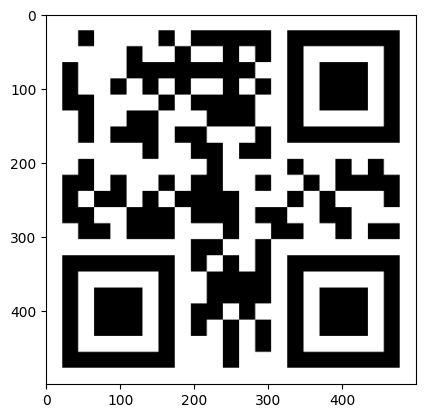

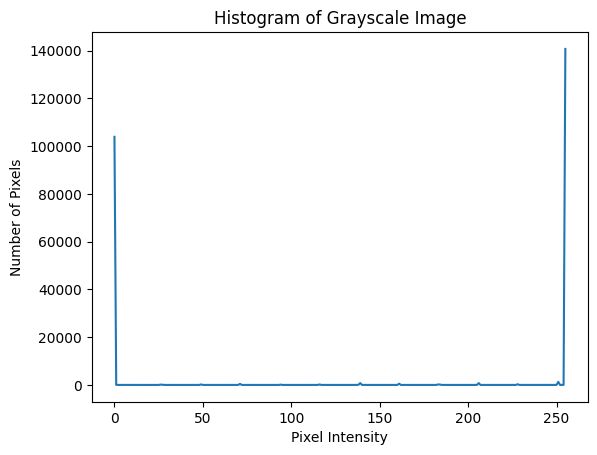

[  0   1   7  14  20  26  27  33  45  49  50  64  65  71  73  75  90  94
 100 111 116 120 124 125 138 139 161 172 176 183 184 187 192 197 203 204
 206 211 215 216 220 228 237 238 241 250 251 252 253 254 255]
no. unique in image 3: 51
[103925      4      2      2      1    119    114      3      1    212
      1      1      1    447      1      3      1    128      1      1
    190      1      1      1     70    773    518      1      1    196
    171      1      1      1      2      1    770      4      3      1
      6    283      1      1      1      2   1278      3      2     17
 140731]


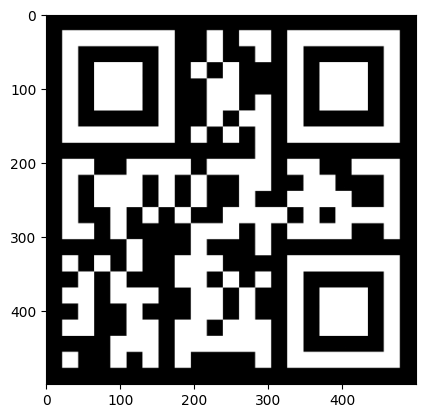

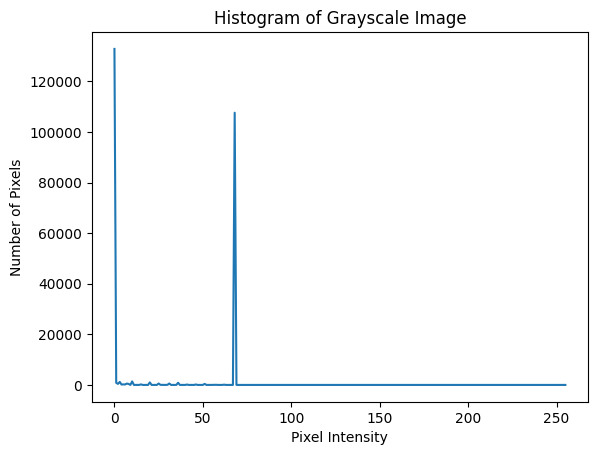

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 25 26 27
 30 31 32 34 35 36 37 41 42 45 46 47 49 51 52 53 55 56 57 58 59 62 63 64
 65 68]
no. unique in image 4: 50
[132848    844    411   1184    149    213    177    535    379      6
   1384      1      1      5    211      1      2      1    988      3
      1    562     32      7     56    566      4      1      3    861
      2    149      2      1    171      3      1    403      8      3
      1     41     44      1      1    107      1      2      1 107622]


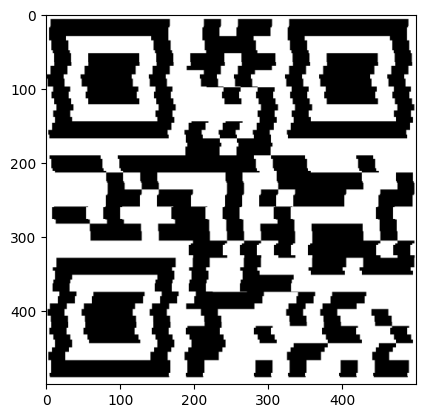

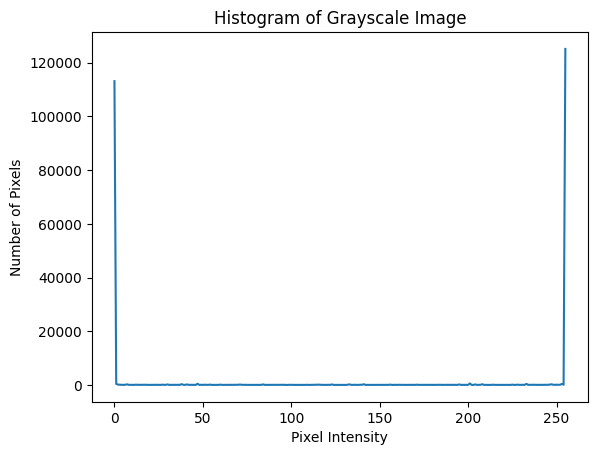

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

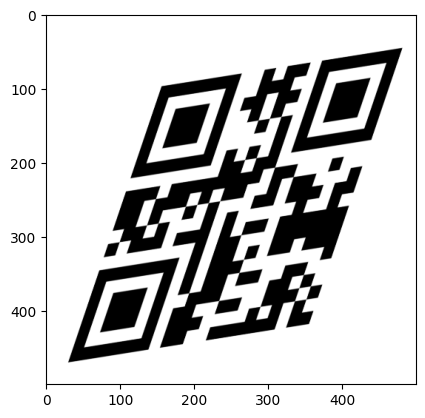

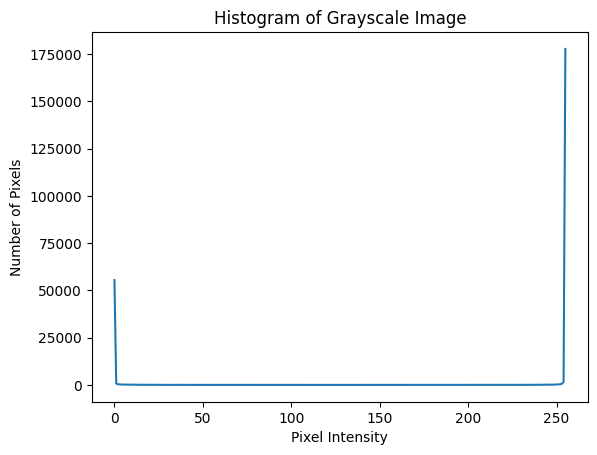

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

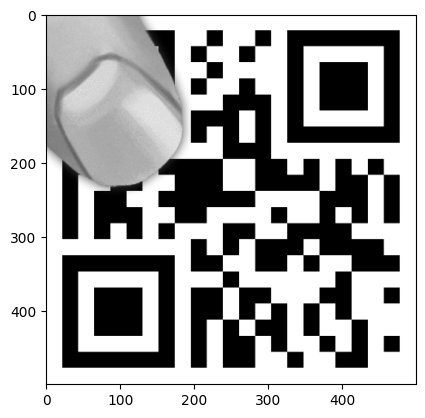

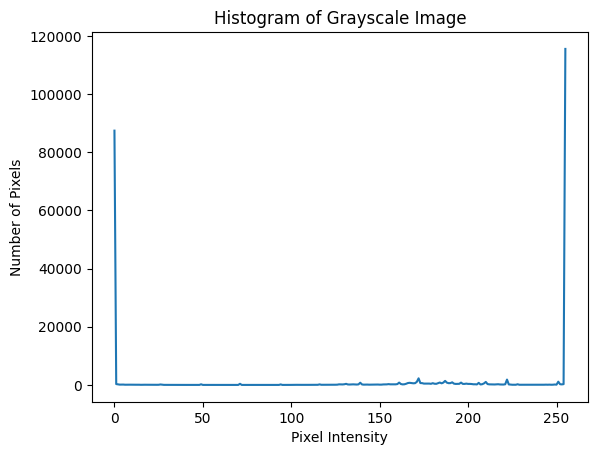

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

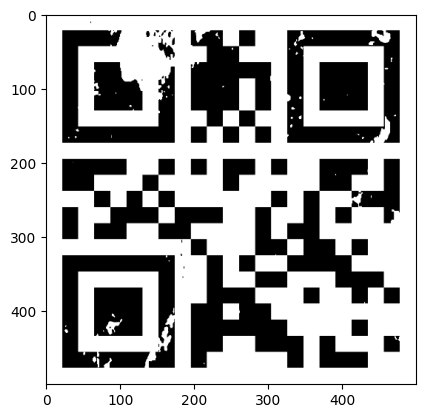

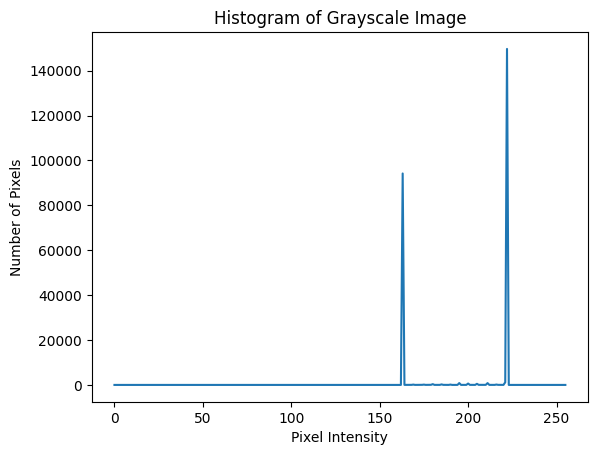

[163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222]
no. unique in image 8: 60
[ 94191     21     22     13     25     28    146     15     17     19
     22     43    140     21     28     35     48    346     17     27
     27     21    229     31     21     15     15    149      8     24
     17     10    827     14     18     14     18    622     25     10
     11     15    484     33     18     17     27     37    813     16
     17     22     17    161     32     42     27     17   1182 149673]


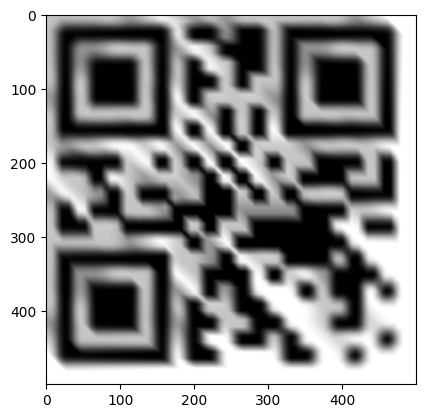

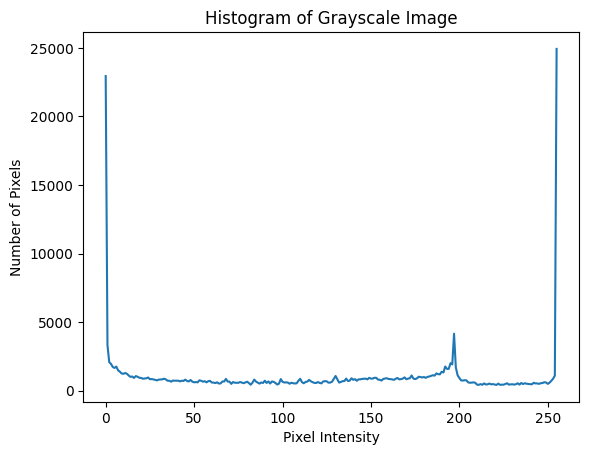

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

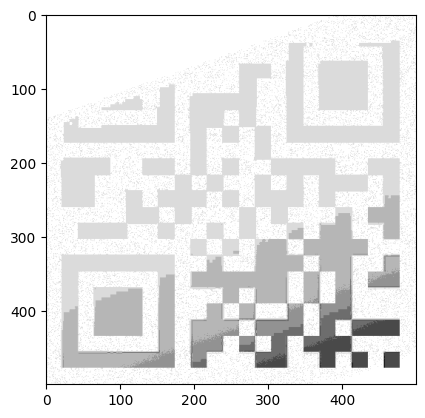

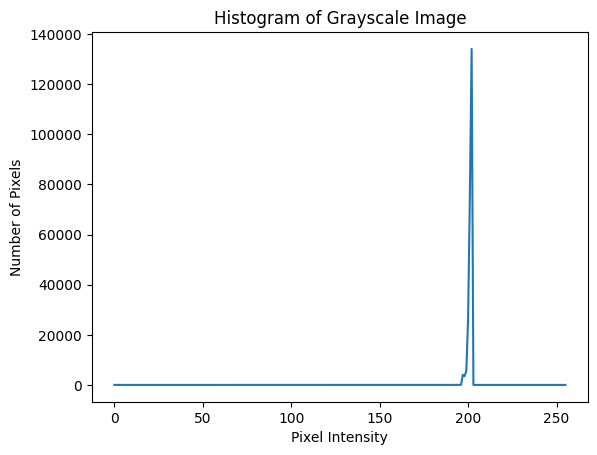

[195 196 197 198 199 200 201 202]
no. unique in image 10: 8
[    15     51   4022   3479   5647  26632  76098 134056]


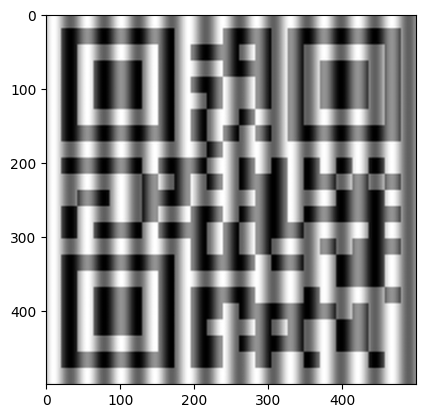

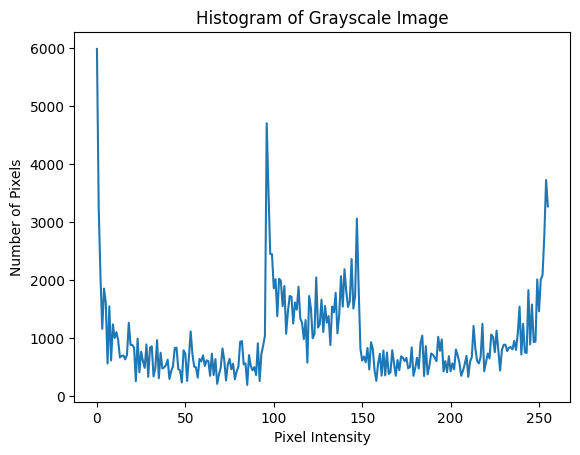

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

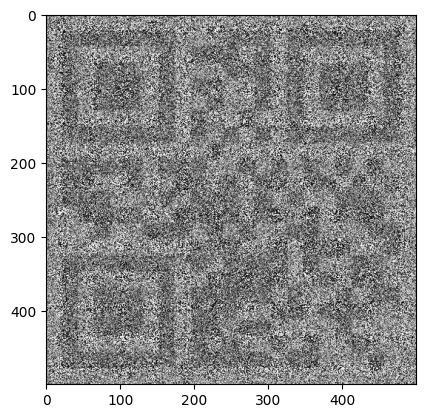

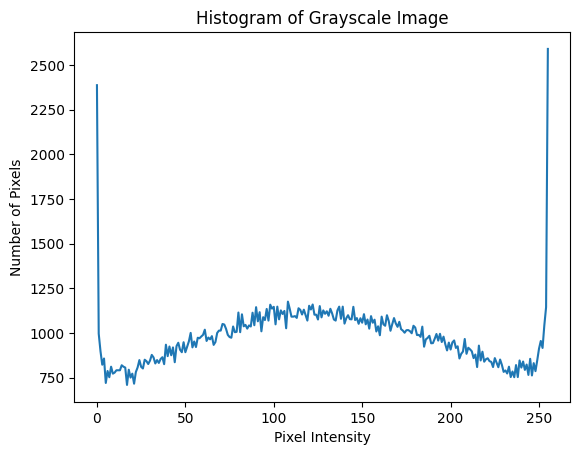

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

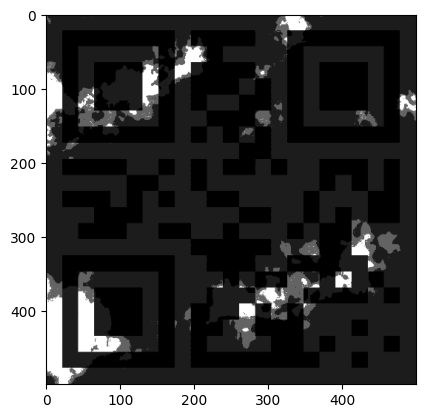

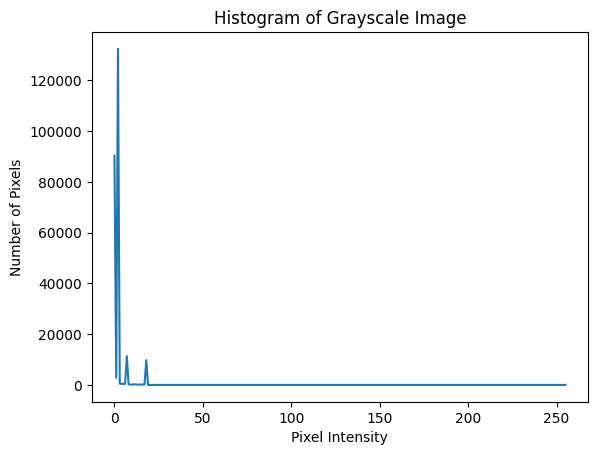

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
no. unique in image 13: 19
[ 90291   2843 132376    476    463    352    465  11320    225    142
    107    268    230    125    106    158    155    140   9758]


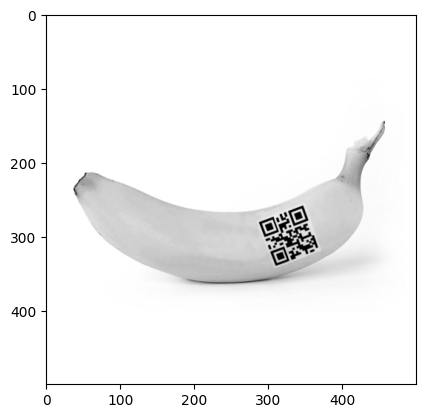

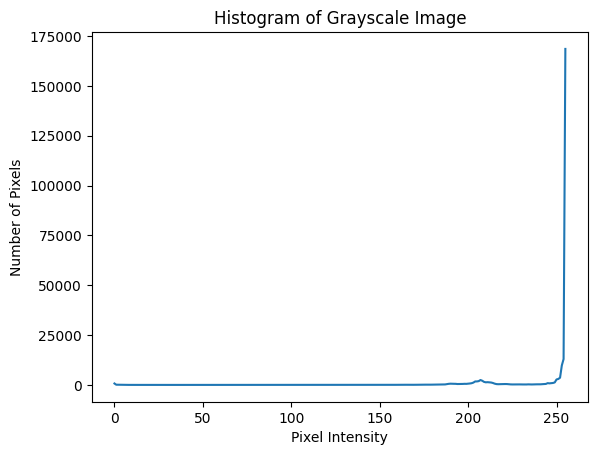

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
for i in range(1,17):
  img = cv2.imread(f"{str(i)}.png")
  img =cv2.resize(img,dsize=(500,500))
  gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  plt.imshow(gray1, cmap="gray")
  plt.show()

  hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])
  plt.figure()
  plt.plot(hist)
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Number of Pixels")
  plt.title("Histogram of Grayscale Image")
  plt.show()

  unique_values, counts = find_unique_pixel_values(gray1)
  print(unique_values)
  print(f"no. unique in image {i}: {len(unique_values)}")
  print(counts)


#Reading Image

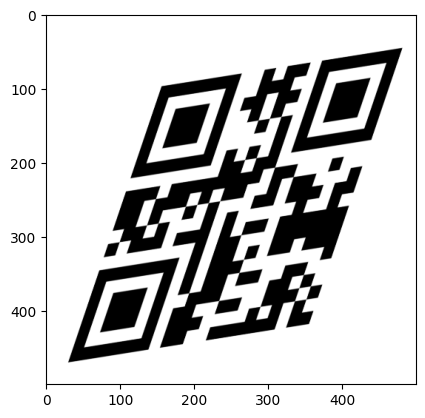

In [ ]:
img = cv2.imread("6.png") # exchange this number with the image number you want to test
img =cv2.resize(img,dsize=(500,500))
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap="gray")
plt.show()

#Image Piplining


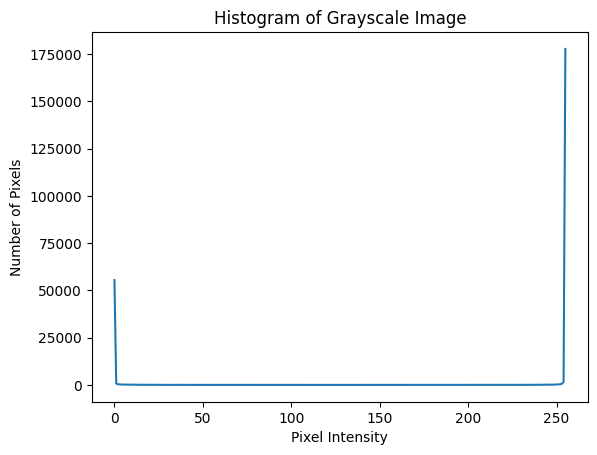

Estimated average intensity: [190.621712]


<ipython-input-2-68a7aa906ca1>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(average_intensity)


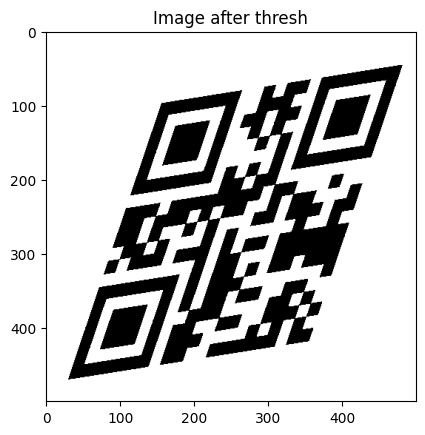

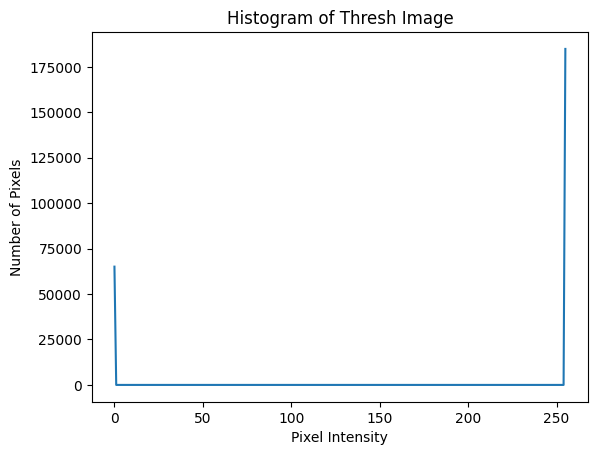

In [ ]:
unique_values, _ = find_unique_pixel_values(gray1)

hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])
# plt.imshow(gray1,cmap="gray")
# plt.title('Image after thresh')
# plt.show()

plt.figure()
plt.plot(hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Grayscale Image")
plt.show()

if is_Dark(unique_values) :

# I noticed that if the image is Darkenen, threasholding by the darkeset pixel gives the best result on the image

      Darkest = np.min(gray1)
      _, gray1 = cv2.threshold(gray1, Darkest, 255, cv2.THRESH_BINARY)

else :
  # if there is no specific thing detected take the average as threshold
  avg_int = average_intensity(hist)
  _, gray1 = cv2.threshold(gray1, avg_int, 255, cv2.THRESH_BINARY)

#check for inv and other after threasholding
if is_inv(gray1):
  gray1 = 255 - gray1






plt.imshow(gray1,cmap="gray")
plt.title('Image after thresh')

hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])
# plt.imshow(gray1,cmap="gray")
# plt.title('Image after thresh')
# plt.show()

plt.figure()
plt.plot(hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Thresh Image")
plt.show()

#Frame Detection

First we make image segmentation using Canny algorithm


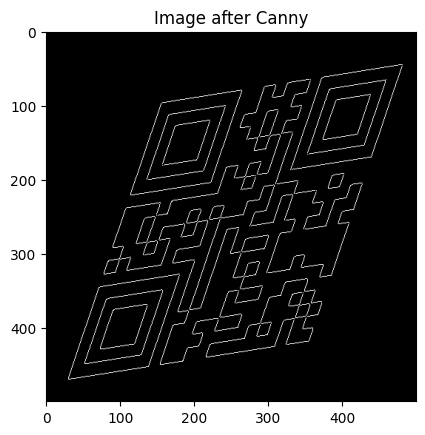

In [ ]:
edges = cv2.Canny(gray1, 200, 200)
plt.imshow(edges,cmap="gray")
plt.title('Image after Canny')
plt.show()

Then We draw hough lines

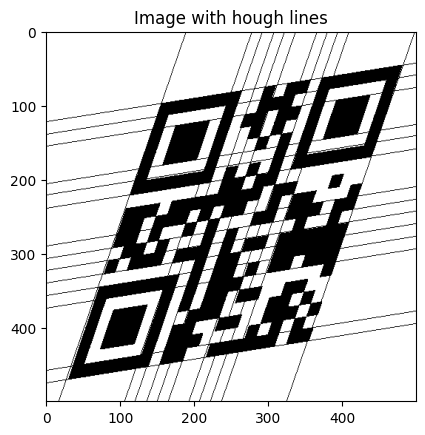

In [ ]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
img2=copy.copy(gray1)
draw_lines(img2,lines)

Then we get the points of intersection between the Hough Lines to be able To get the contour of the shape later on

The problem with hough lines is that it extends to the whole image frame and if we drawn a contour using only hough lines it will take a larger area than the needed so we must find the points of intersection to get rid of that problem


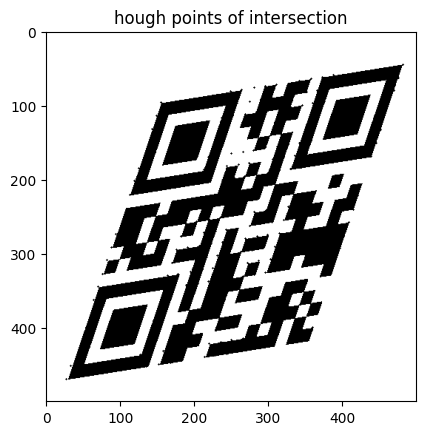

In [ ]:
img3 = copy.copy(img2)
intersections = visualize_intersections(img3,lines)

In [ ]:
# print(intersections)

In [ ]:
img4 =copy.copy(img3)

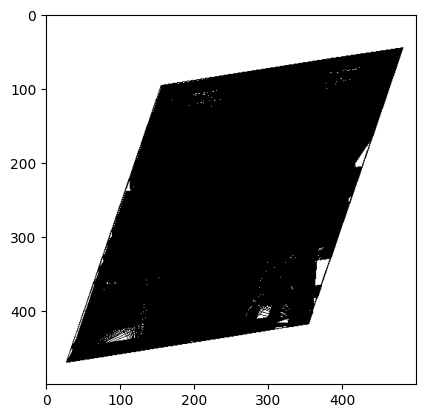

In [ ]:
framed_image = connect_all_points(img4,intersections)

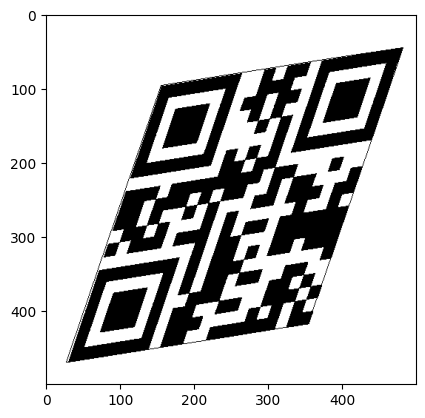

In [ ]:
# gray_img = cv2.cvtColor(framed_image, cv2.COLOR_BGR2GRAY)
# # inv = 255 -gray_img
# limit = np.min(gray_img)

# # Invert the thresholding using bitwise NOT operation
# ret, thresh = cv2.threshold(gray_img,limit,255,cv2.THRESH_BINARY)

inv = 255 - framed_image

# plt.imshow(thresh,cmap="gray")
# plt.show()

# plt.imshow(inv,cmap="gray")
# plt.show()

img_copy = copy.copy(gray1)
contours, hierarchy = cv2.findContours(inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 1)  # Green color

plt.imshow(cont,cmap="gray")
plt.show()

# print(contours)


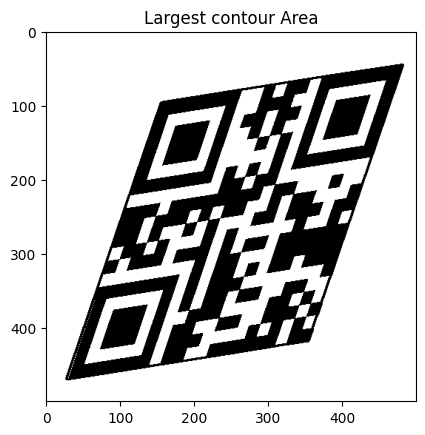

In [ ]:
largest_cont = show_largest_contour(gray1, contours)

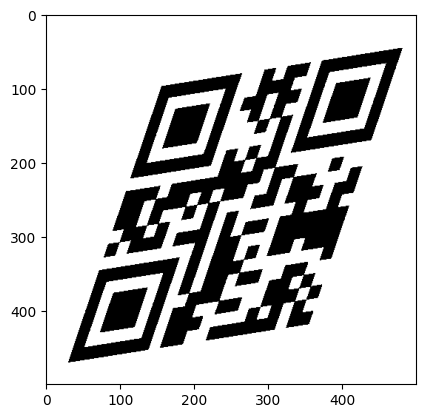

In [ ]:
plt.imshow(gray1,cmap="gray")
plt.show()

In [ ]:
# Approximate the contour with a polygon (adjust epsilon as needed)
epsilon = 0.01 * cv2.arcLength(largest_cont, True)
approx = cv2.approxPolyDP(largest_cont, epsilon, True)

# Ensure we have a quadrilateral (4 corners)
if len(approx) != 4:
  print("Error: Not a quadrilateral")
  # Handle the case where the contour is not a quadrilateral (optional)
  exit()

# Convert the approximated polygon to NumPy array for easier manipulation
approx = np.array(approx, dtype=np.float32)

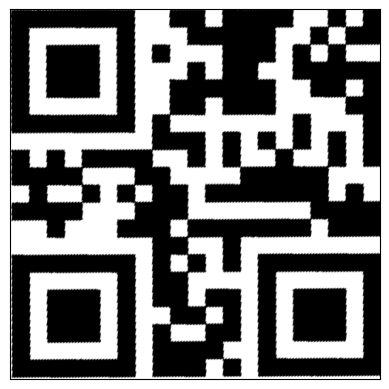

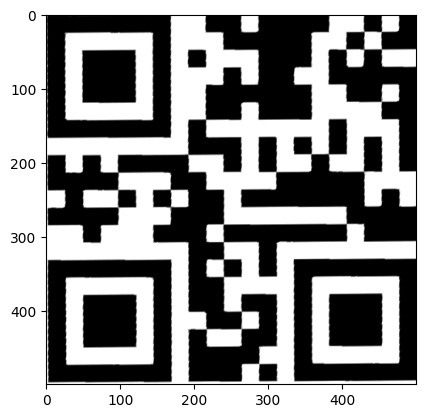

In [ ]:
img_copy = copy.copy(gray1)
desired_quad = np.float32([[0, 0], [img.shape[1] - 1, 0], [img.shape[1] - 1, img.shape[0] - 1], [0, img.shape[0] - 1]])
# Calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(approx, desired_quad)
warped_image = cv2.warpPerspective(img_copy, M, (img.shape[1], img.shape[0]))  # Adjust output size if needed

# for some reason the warped image brought mirrored and rotated

mirrored_image = cv2.flip(warped_image, 0) # mirror horizontally
rotated = rotate_image(mirrored_image,270)

plt.xticks([], [])
plt.yticks([], [])

# for some reason every output has the first column black
rotated[:,0:1]=255

# check after frame detection if the image is flipped and correct it if so
rotated = is_flipped(rotated)

#closng for removing black isolated pixels
kernel = np.ones((5, 5), np.uint8)  # 5x5 rectangle kernel (adjust size as needed)

# Perform Closing operation
for _ in range(2000):
    rotated = cv2.morphologyEx(rotated, cv2.MORPH_CLOSE, kernel)

cv2.imwrite("warped.png", rotated)
plt.imshow(rotated,cmap="gray")

plt.show()

#Image Decoding
Credits To : Ahmed Salama©

(500, 500)
Estimated average intensity: [116.036856]


<ipython-input-2-68a7aa906ca1>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(average_intensity)


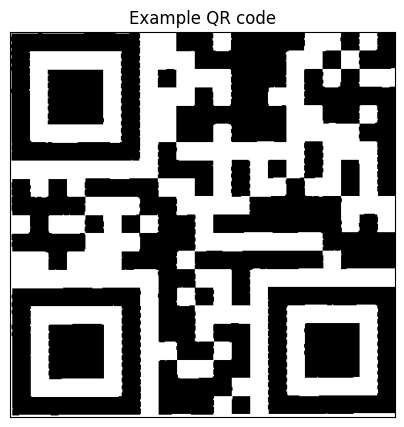

In [ ]:
img = cv2.imread("warped.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
avg_int = average_intensity(hist)

_, img = cv2.threshold(img, avg_int, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code')
plt.imshow(img, cmap='gray');

In [ ]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

0 498 1 500


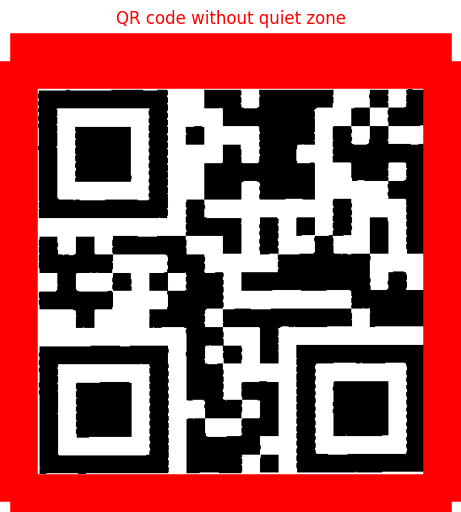

In [ ]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

In [ ]:
size = 0
# for _ in range(4):  # For Rotation if needed
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1
  # if size == 0:
  #   rotate_code = cv2.ROTATE_90_COUNTERCLOCKWISE
  #   # Rotate the image
  #   qr_no_quiet_zone = cv2.rotate(qr_no_quiet_zone, rotate_code)
  #   plt.imshow(qr_no_quiet_zone,cmap="gray")
  #   plt.show()
  # else: break

print(size)


0


In [ ]:
# Therefore the grid cell size is..
grid_cell_size = round(size/7)
print(grid_cell_size)

0


In [ ]:
# And it each row/column is expected to have the following no. of qr_cells
grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
print(grid_cells_num)

ZeroDivisionError: division by zero

In [ ]:
# So now it is time to split the following shape...
print(qr_no_quiet_zone.shape)
qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone,(grid_cell_size*grid_cells_num,grid_cell_size*grid_cells_num))

In [ ]:
# ...into grid cells
qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)

In [ ]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

## Convert grid tiles to numeric values

In [ ]:
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)

In [ ]:
# We want row #8
qr_cells_numeric[8]

In [ ]:
# The first two bits determine the error correction level
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.
ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)

### Mask pattern

In [ ]:
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# Same row as above, the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)

### Format error correction

In [ ]:
# Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
#  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)
fec = []
fec.append(qr_cells_numeric[8, 5])
fec.append(qr_cells_numeric[8, 7])
fec.extend(qr_cells_numeric[0:6, 8])
fec.extend(qr_cells_numeric[7:9, 8])
fec = [int(not(c)) for c in fec]
print(fec)

In [ ]:
# So in total we have the following 15 bits of format info from our QR code
print(ecl, mask, fec)

In [ ]:
# Let's cross-check with our example
# _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):

#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
#         if (i == 8 and j <= 8) or (i <= 8 and j == 8):
#             if (i != 6) and (j != 6):
#                 col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
#                 col.spines[:].set_color('red')
#                 continue
#         col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

In [ ]:
# However..... You need to XOR that with the "format mask": 101010000010010
ecl[0] ^= 1
mask[0] ^= 1
mask[2] ^= 1
fec[5] ^= 1
fec[8] ^= 1

# And now we print...
print(ecl, mask, fec)

## Data extraction

In [ ]:
# Before we proceed, let's write a function for masking to make our lives easier
UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

### Data encoding

In [ ]:
enc = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
print(enc)

### Data length

In [ ]:
len = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
print(len)

### Data extraction

In [ ]:
data_starting_indices = [
    [grid_cells_num-7, grid_cells_num-1, UP],
    [grid_cells_num-11, grid_cells_num-1, CCW],
    [grid_cells_num-10, grid_cells_num-3, DOWN],
    [grid_cells_num-6, grid_cells_num-3, DOWN],
    [grid_cells_num-2, grid_cells_num-3, CW],
    [grid_cells_num-3, grid_cells_num-5, UP],
    [grid_cells_num-7, grid_cells_num-5, UP],
    [grid_cells_num-11, grid_cells_num-5, CCW],
    [grid_cells_num-10, grid_cells_num-7, DOWN],
    [grid_cells_num-6, grid_cells_num-7, DOWN],
    [grid_cells_num-2, grid_cells_num-7, CW],
    [grid_cells_num-3, grid_cells_num-9, UP],
    [grid_cells_num-7, grid_cells_num-9, UP],
    [grid_cells_num-11, grid_cells_num-9, UP],
    [grid_cells_num-16, grid_cells_num-9, UP],
    [grid_cells_num-20, grid_cells_num-9, CCW],
    [grid_cells_num-19, grid_cells_num-11, DOWN],
    [grid_cells_num-14, grid_cells_num-11, DOWN],
    [grid_cells_num-10, grid_cells_num-11, DOWN],
    [grid_cells_num-6, grid_cells_num-11, DOWN],
    # Hmm..? I actually don't know how to proceed now lol
]

ans = ''
for a, b, d in data_starting_indices:
    bits = apply_mask(a, b, d)
    bit_string = ''.join([str(bit) for bit in bits])
    if bit_string[:4] == "0000":
        print(f'{bit_string[:4]} = 0 (NULL TERMINATOR)')
        break
    ans += chr(int(bit_string, 2)) # converts to binary to int, then to ASCII
    print(f'{bit_string} = {ans[-1]}')

print(f'\nDecoded string: {ans}')

#Author : Mohamed Hesham Zidan©